In [1]:
import numpy as np
from scipy.stats import halfnorm
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt
import scipy
import astropy.units as u
import time
from scipy.optimize import brentq
from matplotlib.colors import LogNorm
from scipy.stats import pareto
from cosmodm.wdm_model import WDMModel
from cosmodm.cdm_model import CDMModel
from cosmodm.fdm_model import FDMModel, FDMDu2018


In [2]:
# Do we want to add this formulation of LCDM SHMF to CosmoDM?

def dN_dM_lcdm_Erkal_2016(mmin,mmax):
    m0=2.52e7
    a0=3.26e-5
    n=-1.9
    steps=int(1e6)
    M=np.linspace(mmin,mmax,steps)
    return M**(n) * (1/(m0)**n) *a0

# Uses inverse CDF method to sample halo mass values from pdf, i.e. SHMFs from CosmoDM DM models
def sample_mass(model,mmin,mmax,size=None):
    steps=int(1e6)
    mhalo=np.linspace(mmin,mmax,steps)
    dx=(mmax - mmin)/steps
    pdf=model.subhalo_mass_function(mhalo)/mhalo # dN/dlogM -> dN/dM
    cdf=np.insert(np.cumsum(dx * pdf), 0, 0.)
    cdf=cdf/cdf[-1]
    inverse_cdf=scipy.interpolate.interp1d(cdf[:-1], mhalo,fill_value="extrapolate")
    
    # unnormalized mass draws 
    mass_draws=inverse_cdf(np.random.uniform(size=size))
    
    # normalization factor 
    
    integral=float(np.trapz(pdf,x=mhalo)) 
    norm_factor=integral/size
    
    return mass_draws, norm_factor 

#  Mass sampling (Plotting)

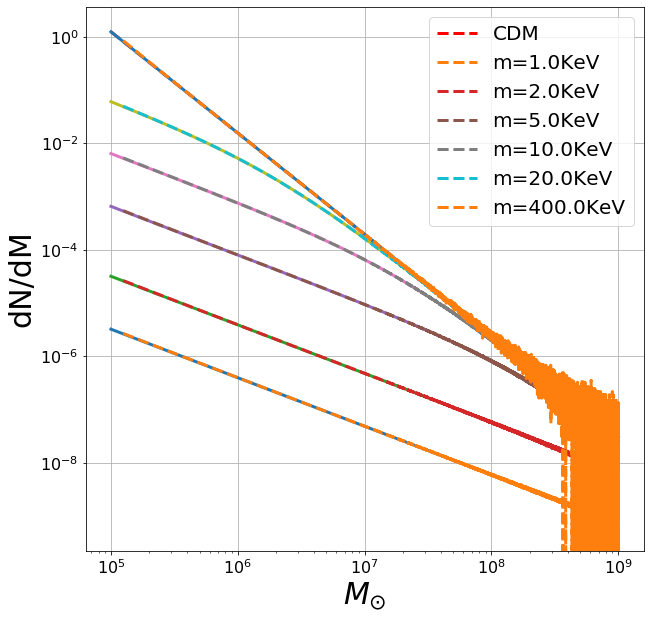

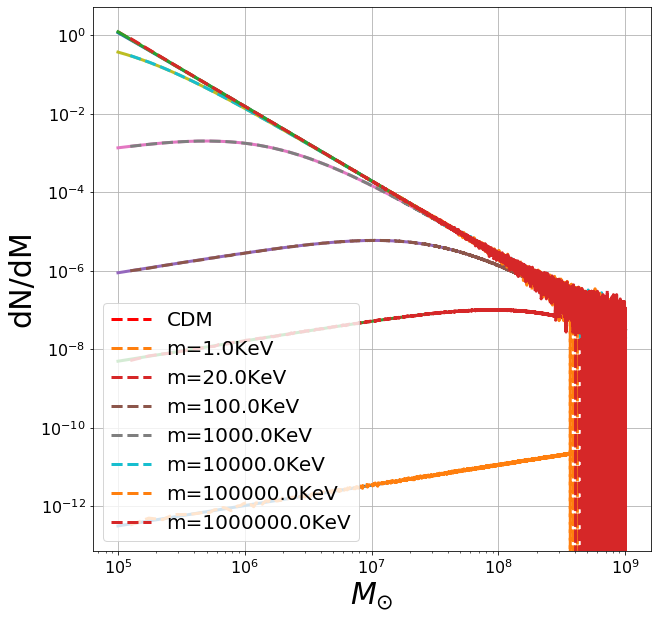

In [5]:
def plot(mass_arr,model):
    M=np.linspace(10**5,10**9,1000000)
    bins=np.linspace(10**5,10**9, 20000)
    fig, ax = plt.subplots(figsize=(10,10))
    plt.plot(M,CDMModel().subhalo_mass_function(M)/M, color='red',linewidth=3, linestyle='--',label="CDM")
    
    for idx,mass_val in enumerate(mass_arr):
        m_draw, norm = sample_mass(model(mass=mass_val),1e5,1e9,size=100000000)
        n,x=np.histogram(m_draw,bins=bins)
        bin_centers = 0.5*(x[1:]+x[:-1])
        diff_bins=np.diff(bins)
        plt.plot(M,model(mass=mass_val).subhalo_mass_function(M)/M,linewidth=3)
        plt.plot(bin_centers,(n*norm)/diff_bins,linestyle='--',linewidth=3,label="m={:.1f}KeV".format(mass_val))
    
    plt.yscale('log')
    plt.xscale('log')
    plt.ylabel("dN/dM", fontsize=30)
    plt.xlabel("$M_{\odot}$",fontsize=30)
    plt.legend(fontsize=20,loc='best')
    plt.tick_params(labelsize=16)
    plt.grid()
    plt.show()
        
    

plot([1,2,5,10,20,400],WDMModel)
plot([1, 20, 100,1000,10000,100000,int(1e6)],FDMModel)


